In [65]:
%matplotlib notebook 

In [66]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
def kelly(pay_out_odds,chance_of_winning,current_winnings):
    kbet = 0 if pay_out_odds == 1 else ((pay_out_odds * chance_of_winning - 1) * current_winnings) / (pay_out_odds - 1)
    return kbet

def kelly_gambling(pay_out_odds,chance_of_winning):
    kbet = chance_of_winning - ((1.0-chance_of_winning)/pay_out_odds)
    return kbet

def kelly_investing(chance_of_winning,negative_loss,gain_positive):
    kbet = chance_of_winning / negative_loss - (1-chance_of_winning) / gain_positive
    return kbet



<IPython.core.display.Javascript object>


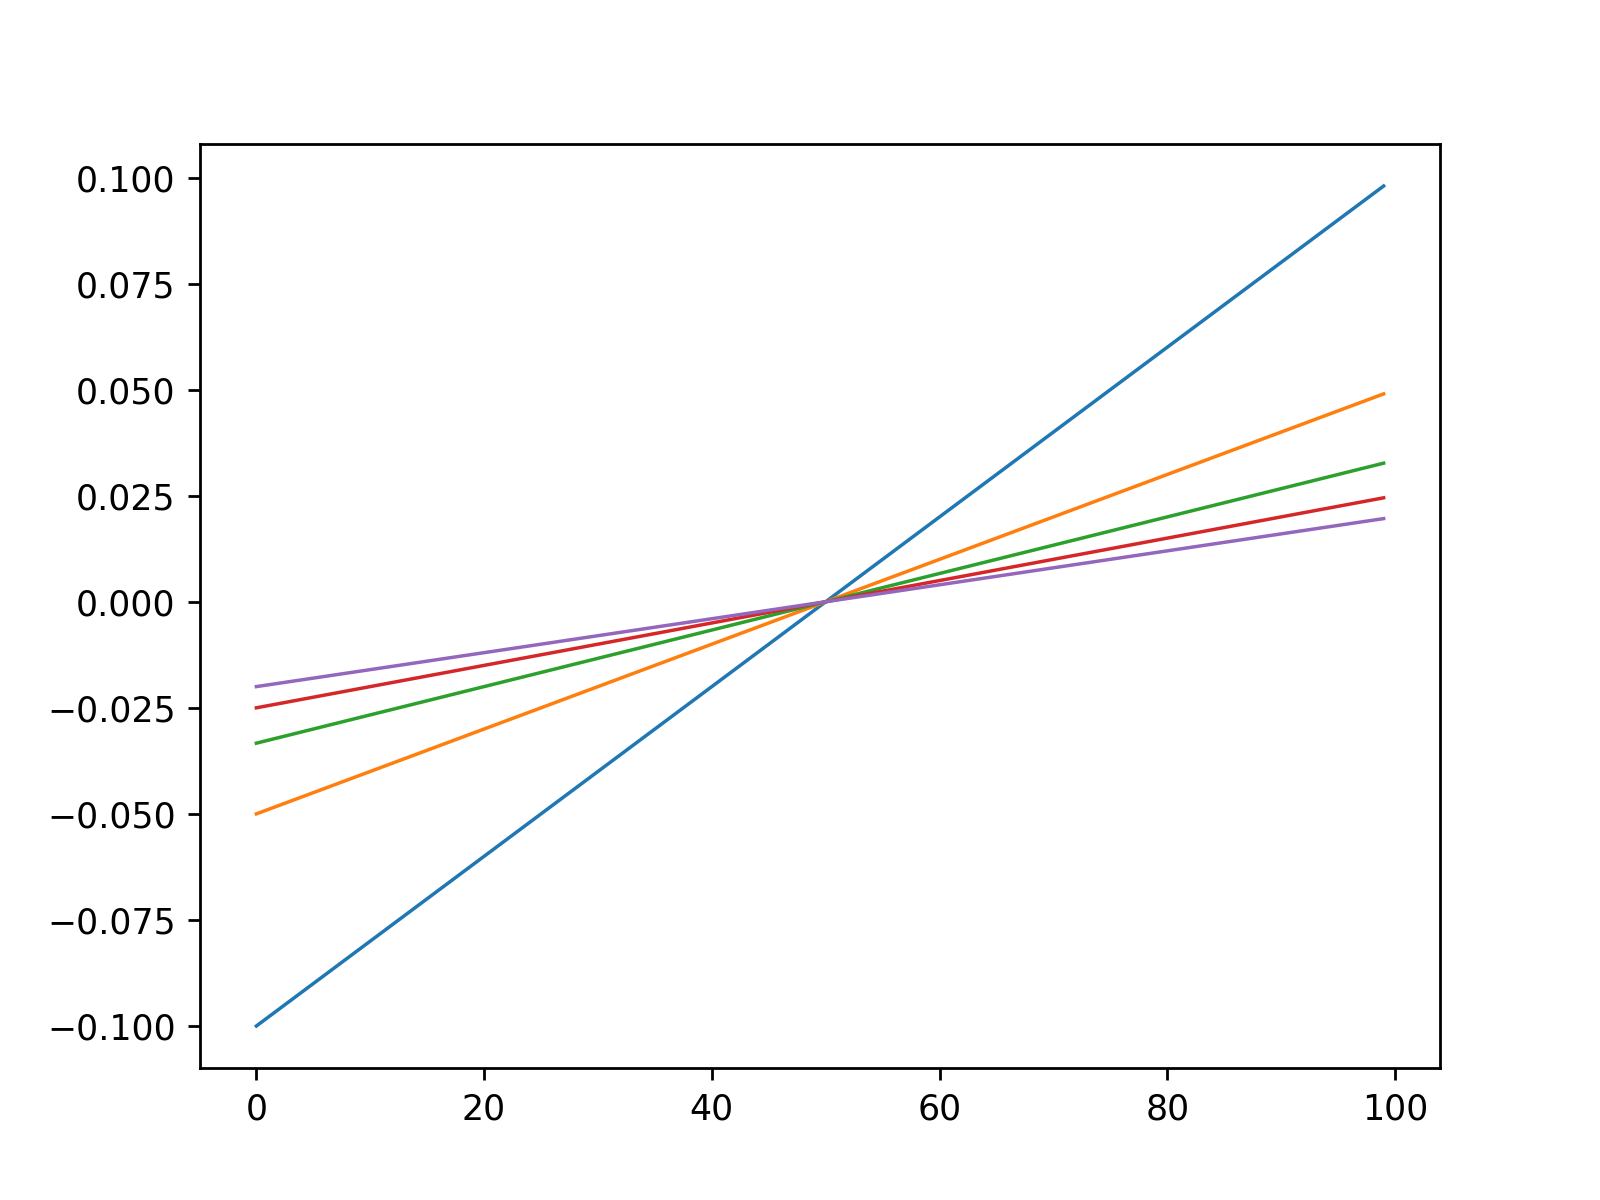

In [68]:
# plot
fig, ax = plt.subplots()
x=[i for i in range(100)]
y1=[kelly_investing(i/100,0.10,0.10)/100 for i in range(100)]
y2=[kelly_investing(i/100,0.20,0.20)/100 for i in range(100)]
y3=[kelly_investing(i/100,0.30,0.30)/100 for i in range(100)]
y4=[kelly_investing(i/100,0.40,0.40)/100 for i in range(100)]
y5=[kelly_investing(i/100,0.50,0.50)/100 for i in range(100)]
ax.plot(x, y1, linewidth=1.0)
ax.plot(x, y2, linewidth=1.0)
ax.plot(x, y3, linewidth=1.0)
ax.plot(x, y4, linewidth=1.0)
ax.plot(x, y5, linewidth=1.0)
plt.show()


<IPython.core.display.Javascript object>


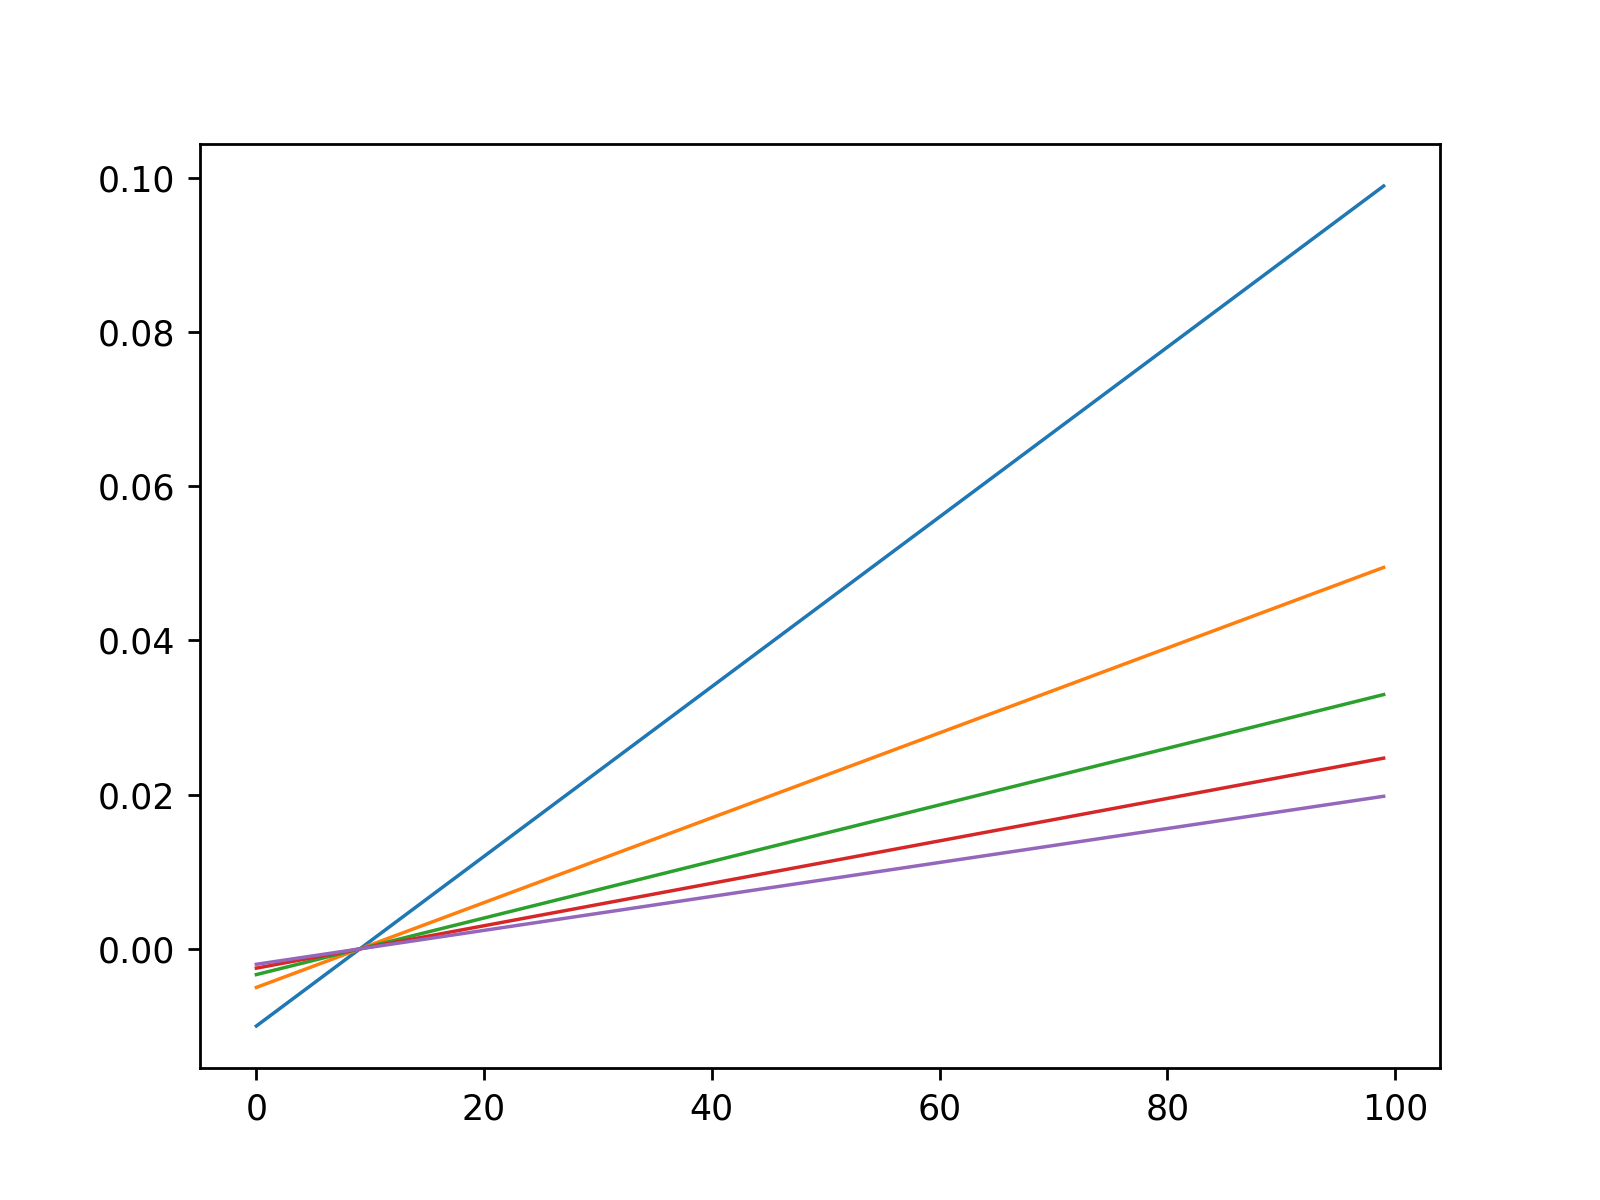

In [69]:
# plot option like pay off 
fig, ax = plt.subplots()
x=[i for i in range(100)]
y1=[kelly_investing(i/100,0.10,0.10*10)/100 for i in range(100)]
y2=[kelly_investing(i/100,0.20,0.20*10)/100 for i in range(100)]
y3=[kelly_investing(i/100,0.30,0.30*10)/100 for i in range(100)]
y4=[kelly_investing(i/100,0.40,0.40*10)/100 for i in range(100)]
y5=[kelly_investing(i/100,0.50,0.50*10)/100 for i in range(100)]
ax.plot(x, y1, linewidth=1.0)
ax.plot(x, y2, linewidth=1.0)
ax.plot(x, y3, linewidth=1.0)
ax.plot(x, y4, linewidth=1.0)
ax.plot(x, y5, linewidth=1.0)
plt.show()

In [70]:

#plt.rcParams['figure.figsize'] = [10, 100]

def RunGame2(wlt, OriginalAmountOfMoney, BettingStyle, 
             ChanceOfWinning, FractionBetting, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, ConstantBet):
    Monies = [OriginalAmountOfMoney, OriginalAmountOfMoney]
    Bets = [0,0]
    #print(f"BettingStyle {BettingStyle},ChanceOfWinning {ChanceOfWinning},FractionBetting {FractionBetting},CanGoIntoDebt {CanGoIntoDebt},BettingLimit {BettingLimit},MaxBet {MaxBet},PayOutOdds {PayOutOdds},ConstantBet {ConstantBet}")
    for i in range(len(wlt)):
        betamount = Bet2(Monies, BettingStyle, ChanceOfWinning, FractionBetting, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, ConstantBet)
        #if "Kelly" in BettingStyle or "contant" in BettingStyle:
        #print(f"Current Money {Monies[-1]}")
        if Monies[-1] == 0: # avoid divide by zero
            Monies[-1] = 1
            betamount = 0
        else:
            if Monies[-1] < 0: 
                Monies[-1] = 1 # Ruin
                betamount = 0
                #print(f"ruin bet amount {betamount}")
        #print(f"betamount {betamount} Current Monies {Monies[-1]} percentate {betamount/Monies[-1]}")
        Bets.append(betamount/Monies[-1])
        newMonies = Monies[-1] + wlt[i] * betamount
        
        Monies.append(newMonies)
    return Monies, Bets

def Bet2(winnings_history, style, chance_of_winning, fraction_betting, can_go_into_debt, betting_limit, max_bet, pay_out_odds, constant_bet):
    current_winnings = winnings_history[-1] # last value
    kbet = 0 if pay_out_odds == 1 else ((pay_out_odds * chance_of_winning - 1) * current_winnings) / (pay_out_odds - 1)
    fbet = fraction_betting * current_winnings
    mbet = abs(winnings_history[-1] - winnings_history[-2])
    
    if style == "constant bet":
        if current_winnings >= constant_bet:
            return constant_bet
        elif can_go_into_debt:
            return constant_bet
        else:
            return 0
    elif style == "Kelly criterion":
        if kbet > 0:
            #print(f"chance of winning:{chance_of_winning}, currentwinnnings: {current_winnings},kbet {kbet},percentage of winnings {kbet/current_winnings}")    
            if betting_limit:
                #print("kelly betting limit")
                return min(kbet, max_bet)
            else:
                #print(f"kbet {kbet} current_winnings {current_winnings}")
                return kbet
        else:
            return 0
    elif style == "constant fraction":
        if betting_limit:
            return min(fbet, max_bet)
        else:
            return fbet
    elif style == "martingale":
        if len(winnings_history) == 2:
            return 1
        elif winnings_history[-1] - winnings_history[-2] > 0:
            return mbet
        else:
            return min(2 * mbet, max_bet if betting_limit else float("inf"), float("inf") if can_go_into_debt else current_winnings)
    elif style == "anti-martingale":
        if len(winnings_history) == 2:
            return 1
        elif winnings_history[-1] - winnings_history[-2] > 0:
            return min(2 * mbet, max_bet if betting_limit else float("inf"), float("inf") if can_go_into_debt else current_winnings)
        else:
            return min(mbet / 2, max_bet if betting_limit else float("inf"), float("inf") if can_go_into_debt else current_winnings)
    else:
        return 1

def GetData2(ChanceOfWinning, NumGames, OriginalAmountOfMoney, FractionBetting, 
             CanGoIntoDebt, BettingLimit, MaxBet, seed, PayOutOdds, ConstantBet):
    wlt = []
    if seed:
        random.seed(seed)
    for _ in range(NumGames):
        if random.random() > 1 - ChanceOfWinning:
            wlt.append(PayOutOdds - 1)
        else:
            wlt.append(-1)
    #print(wlt)
    y1 = RunGame2(wlt, OriginalAmountOfMoney, "constant bet", ChanceOfWinning, .1, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, ConstantBet)
    y2 = RunGame2(wlt, OriginalAmountOfMoney, "Kelly criterion", ChanceOfWinning, .1, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, 0)
    #print("kbet",y2)
    y3 = RunGame2(wlt, OriginalAmountOfMoney, "constant fraction", ChanceOfWinning, FractionBetting, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, 0)
    y4 = RunGame2(wlt, OriginalAmountOfMoney, "martingale", ChanceOfWinning, .1, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, 0)
    y5 = RunGame2(wlt, OriginalAmountOfMoney, "anti-martingale", ChanceOfWinning, .1, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, 0)
    return y1[0], y2[0], y3[0], y4[0], y5[0] , y2[1]  # y2[1] is kelly bet amount


def GetData2_orginal(ChanceOfWinning, NumGames, OriginalAmountOfMoney, FractionBetting, 
             CanGoIntoDebt, BettingLimit, MaxBet, seed, PayOutOdds, ConstantBet):
    wlt = []
    if seed:
        random.seed(seed)
    for _ in range(NumGames):
        if random.random() > 1 - ChanceOfWinning:
            wlt.append(PayOutOdds - 1)
        else:
            wlt.append(-1)
    y1 = RunGame2(wlt, OriginalAmountOfMoney, "constant bet", ChanceOfWinning, .1, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, ConstantBet)
    y2 = RunGame2(wlt, OriginalAmountOfMoney, "Kelly criterion", ChanceOfWinning, .1, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, 0)
    #print("kbet",y2)
    y3 = RunGame2(wlt, OriginalAmountOfMoney, "constant fraction", ChanceOfWinning, FractionBetting, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, 0)
    y4 = RunGame2(wlt, OriginalAmountOfMoney, "martingale", ChanceOfWinning, .1, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, 0)
    y5 = RunGame2(wlt, OriginalAmountOfMoney, "anti-martingale", ChanceOfWinning, .1, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, 0)
    return y1, y2, y3, y4, y5


In [71]:
import matplotlib.pyplot as plt

def Chart(ChanceOfWinning, NumGames, OriginalAmountOfMoney, 
          FractionBetting, CanGoIntoDebt, BettingLimit, MaxBet, 
          seed,
          PayOutOdds, ConstantBet):
    sum1, sum2, sum3, sum4, sum5 = 0, 0, 0, 0, 0
    #for _ in range(25): 
        # play 100 games, 25 times and return winning of each game
    data = GetData2(ChanceOfWinning, NumGames, OriginalAmountOfMoney, 
                    FractionBetting, CanGoIntoDebt, BettingLimit, MaxBet, 
                    seed,
                    PayOutOdds, ConstantBet)
    return data
    

def Chart_orginal(ChanceOfWinning, NumGames, OriginalAmountOfMoney, 
          FractionBetting, CanGoIntoDebt, BettingLimit, MaxBet, 
          seed,
          PayOutOdds, ConstantBet):
    sum1, sum2, sum3, sum4, sum5 = 0, 0, 0, 0, 0
    for _ in range(25):
        data = GetData2(ChanceOfWinning, NumGames, OriginalAmountOfMoney, 
                        FractionBetting, CanGoIntoDebt, BettingLimit, MaxBet, 
                        seed,
                        PayOutOdds, ConstantBet)
        
        sum1 += data[0][-1] 
        sum2 += data[1][-1] 
        sum3 += data[2][-1] 
        sum4 += data[3][-1] 
        sum5 += data[4][-1] 
    return sum1, sum2, sum3, sum4, sum5


def onelegend(color_text):
    color, text = color_text
    fig, ax = plt.subplots()
    ax.plot([], [], color=color, linewidth=10)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.legend([text])
    plt.show()

<IPython.core.display.Javascript object>


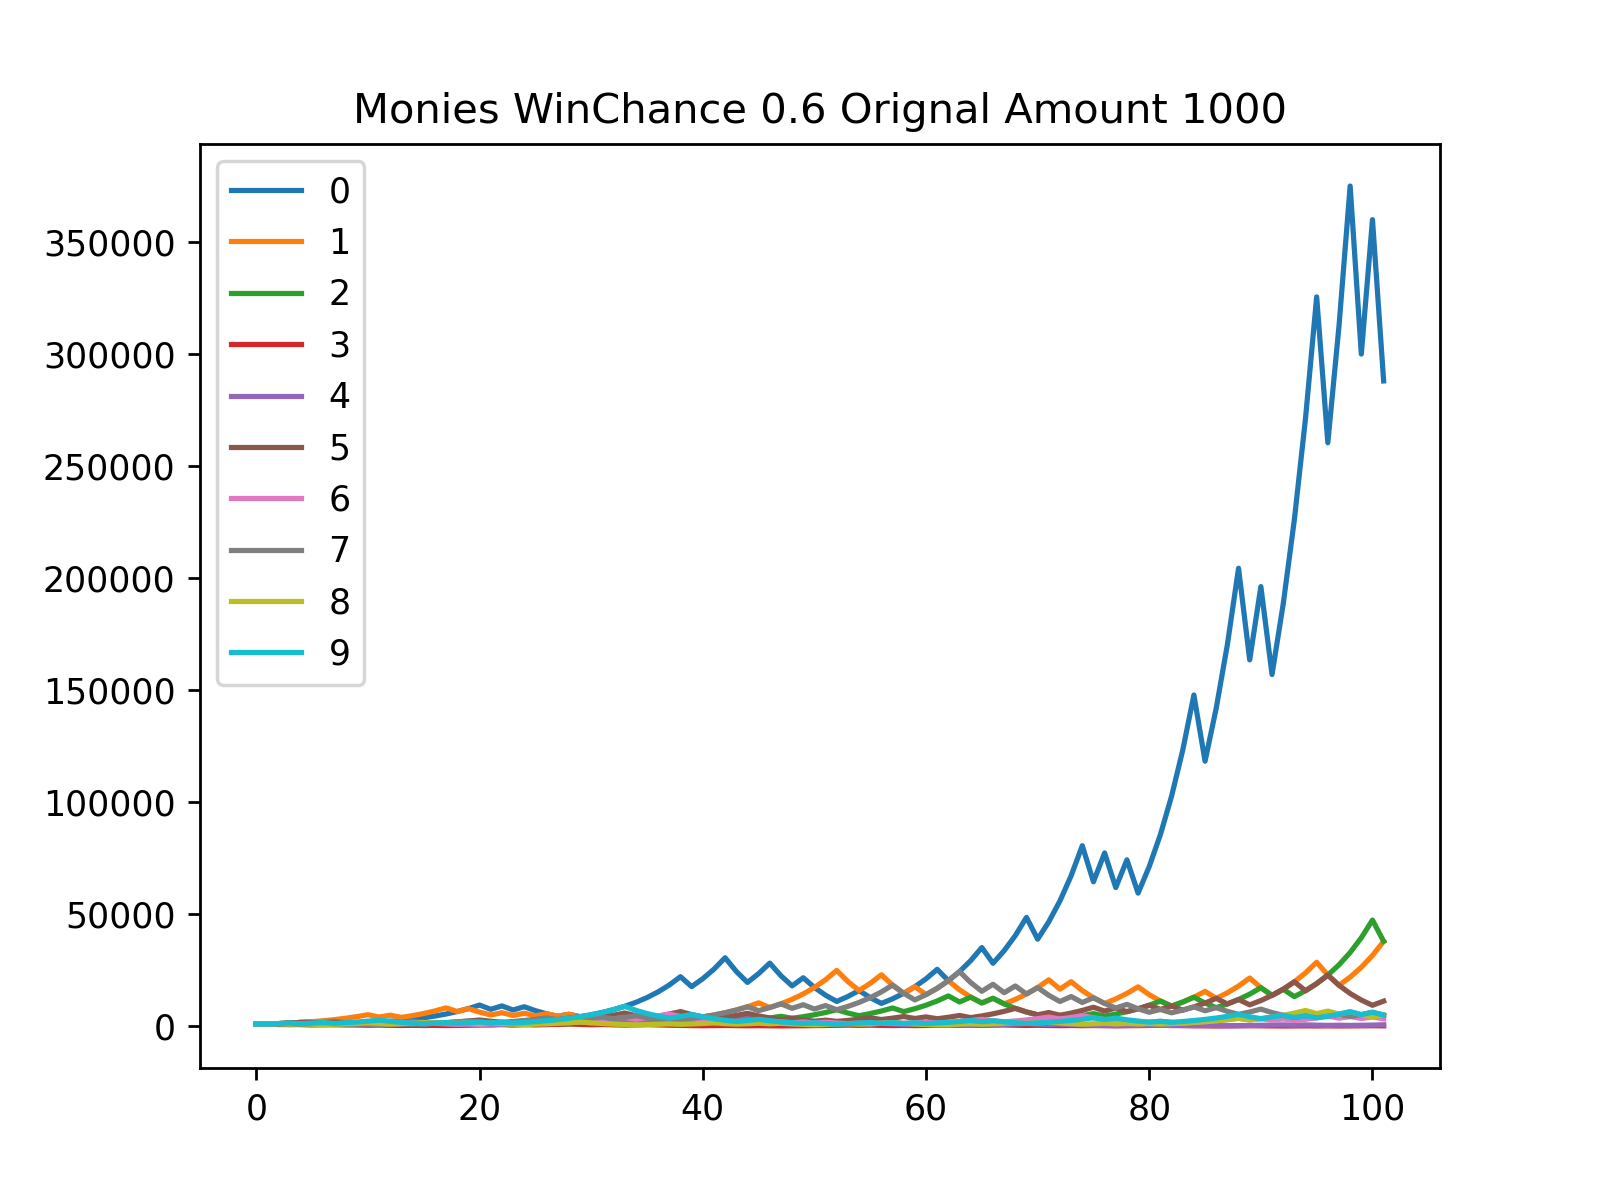

<IPython.core.display.Javascript object>


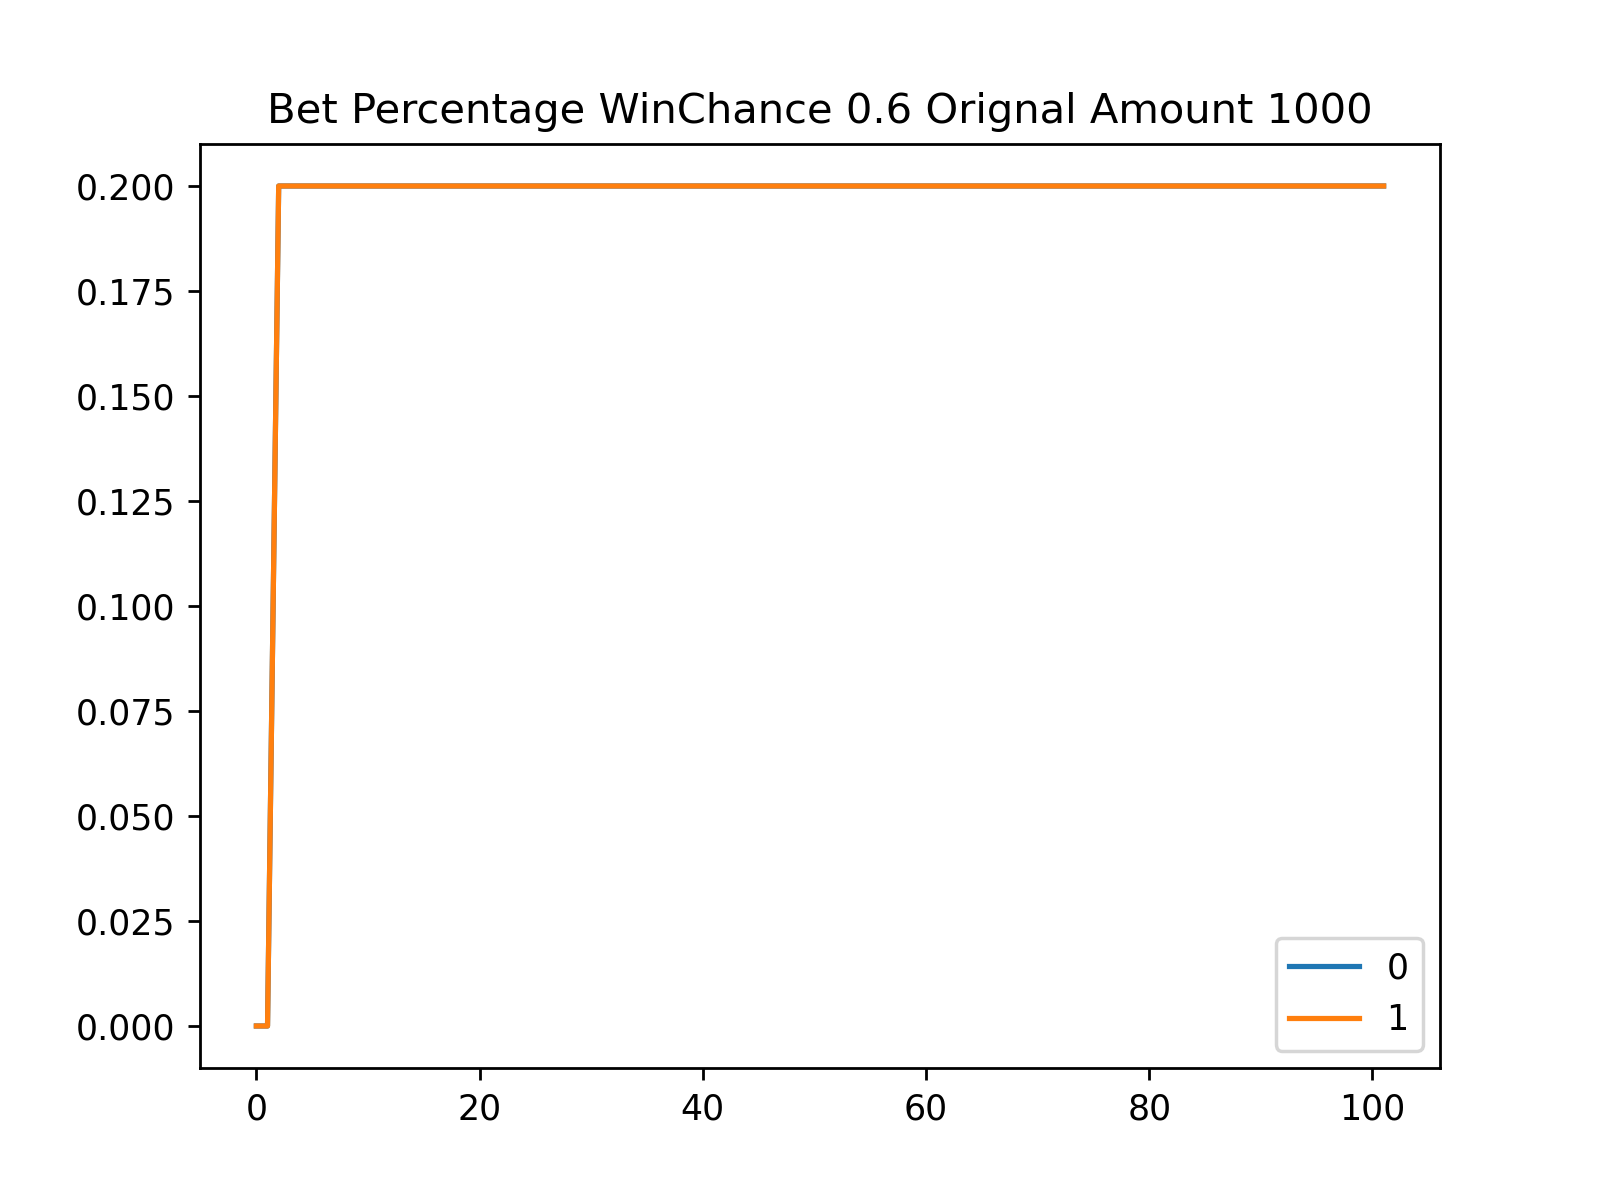

<IPython.core.display.Javascript object>


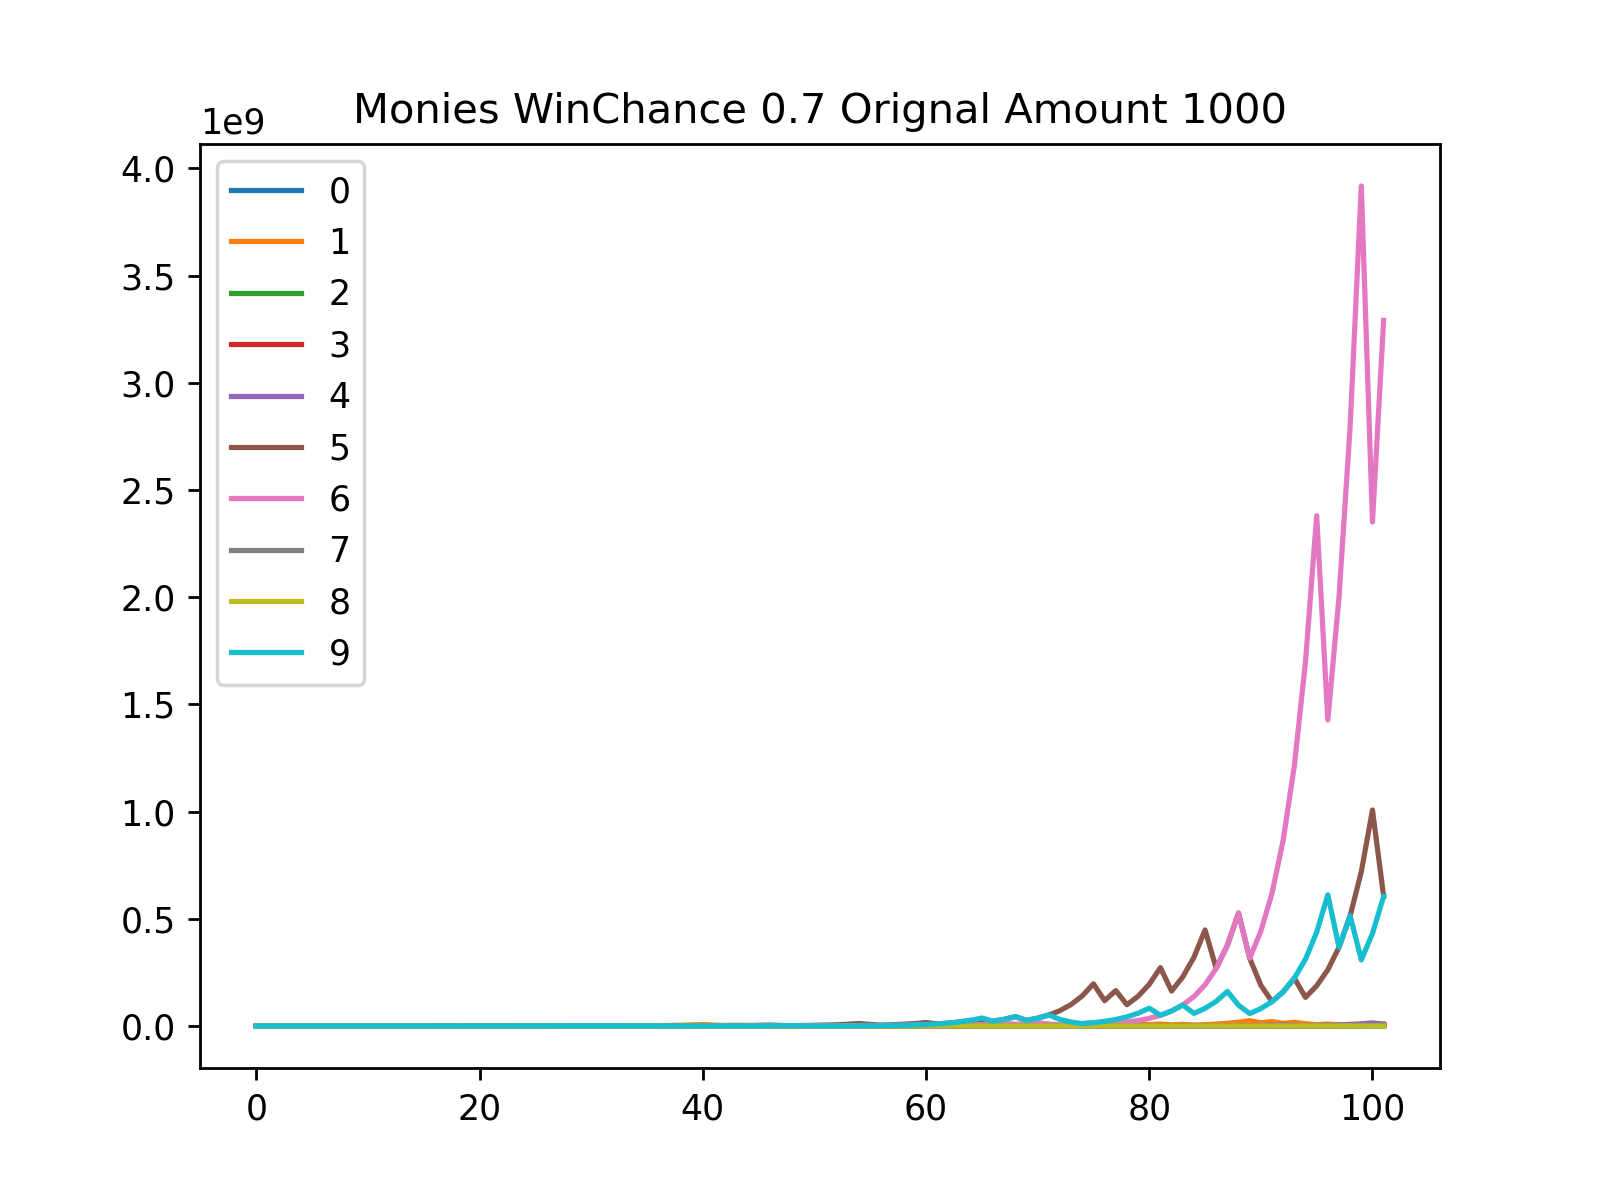

<IPython.core.display.Javascript object>


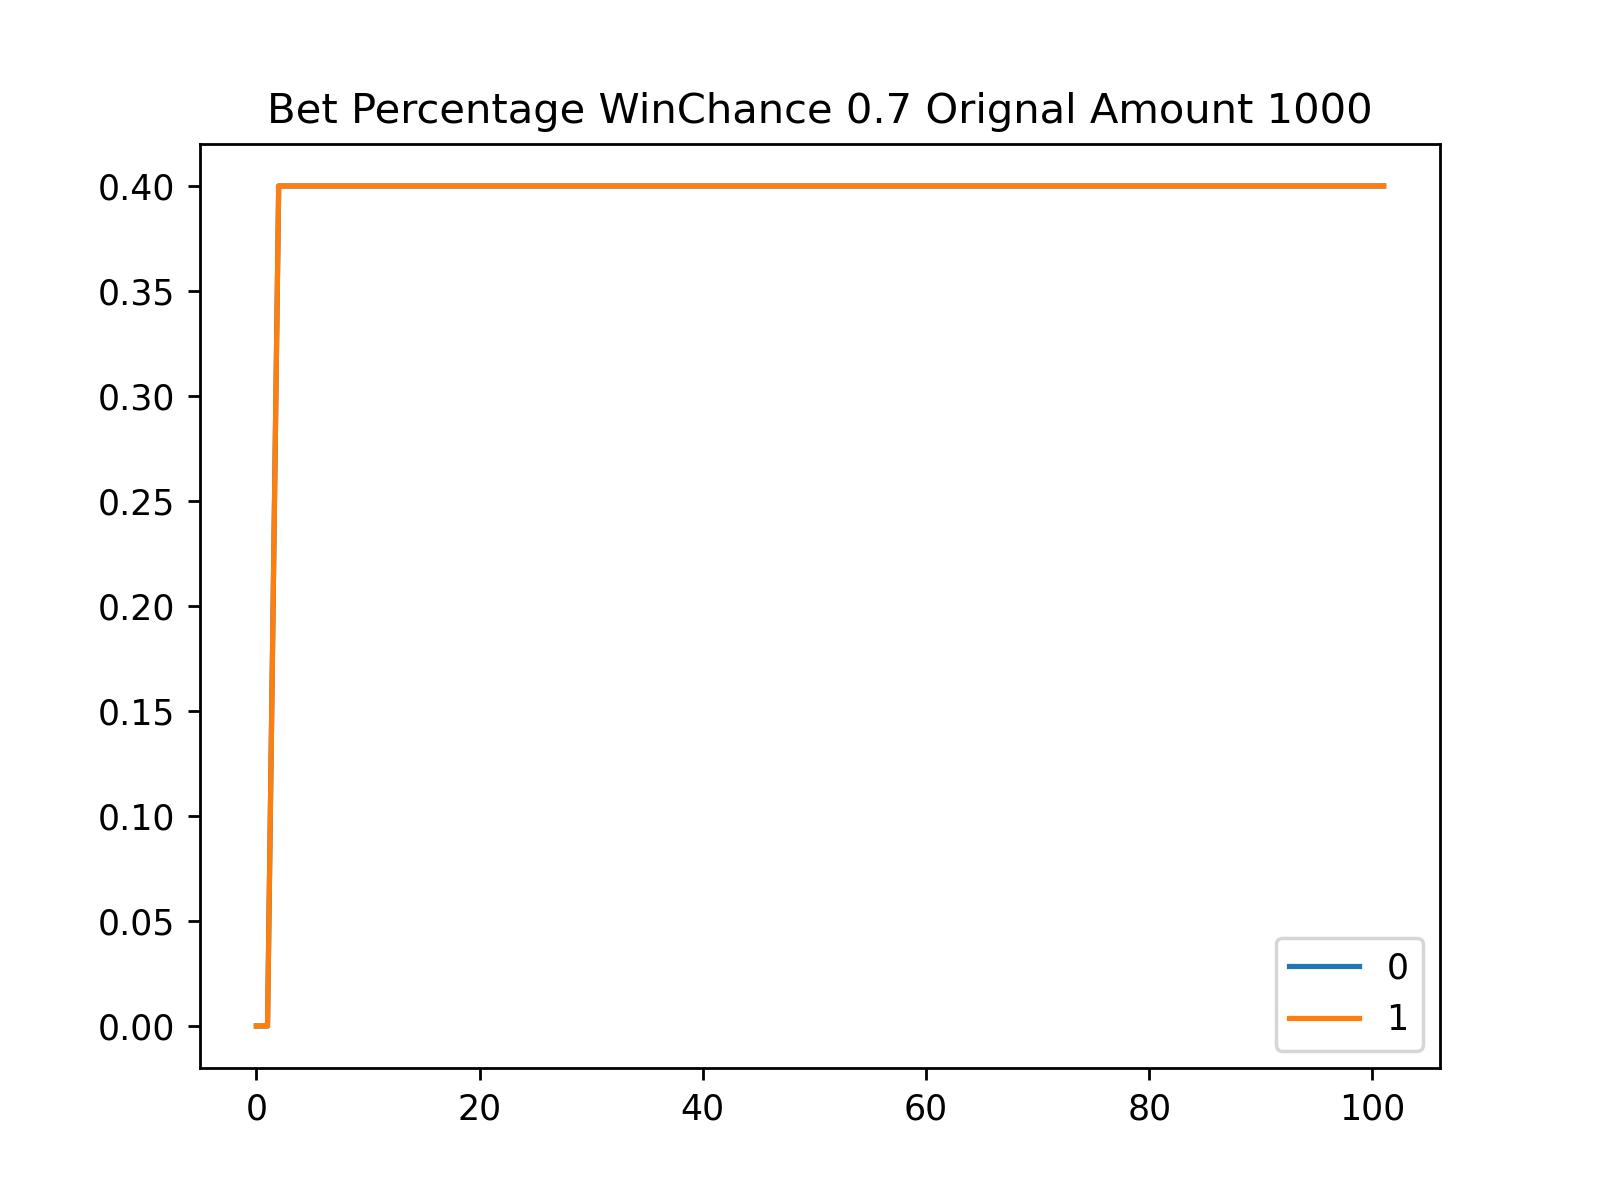

<IPython.core.display.Javascript object>


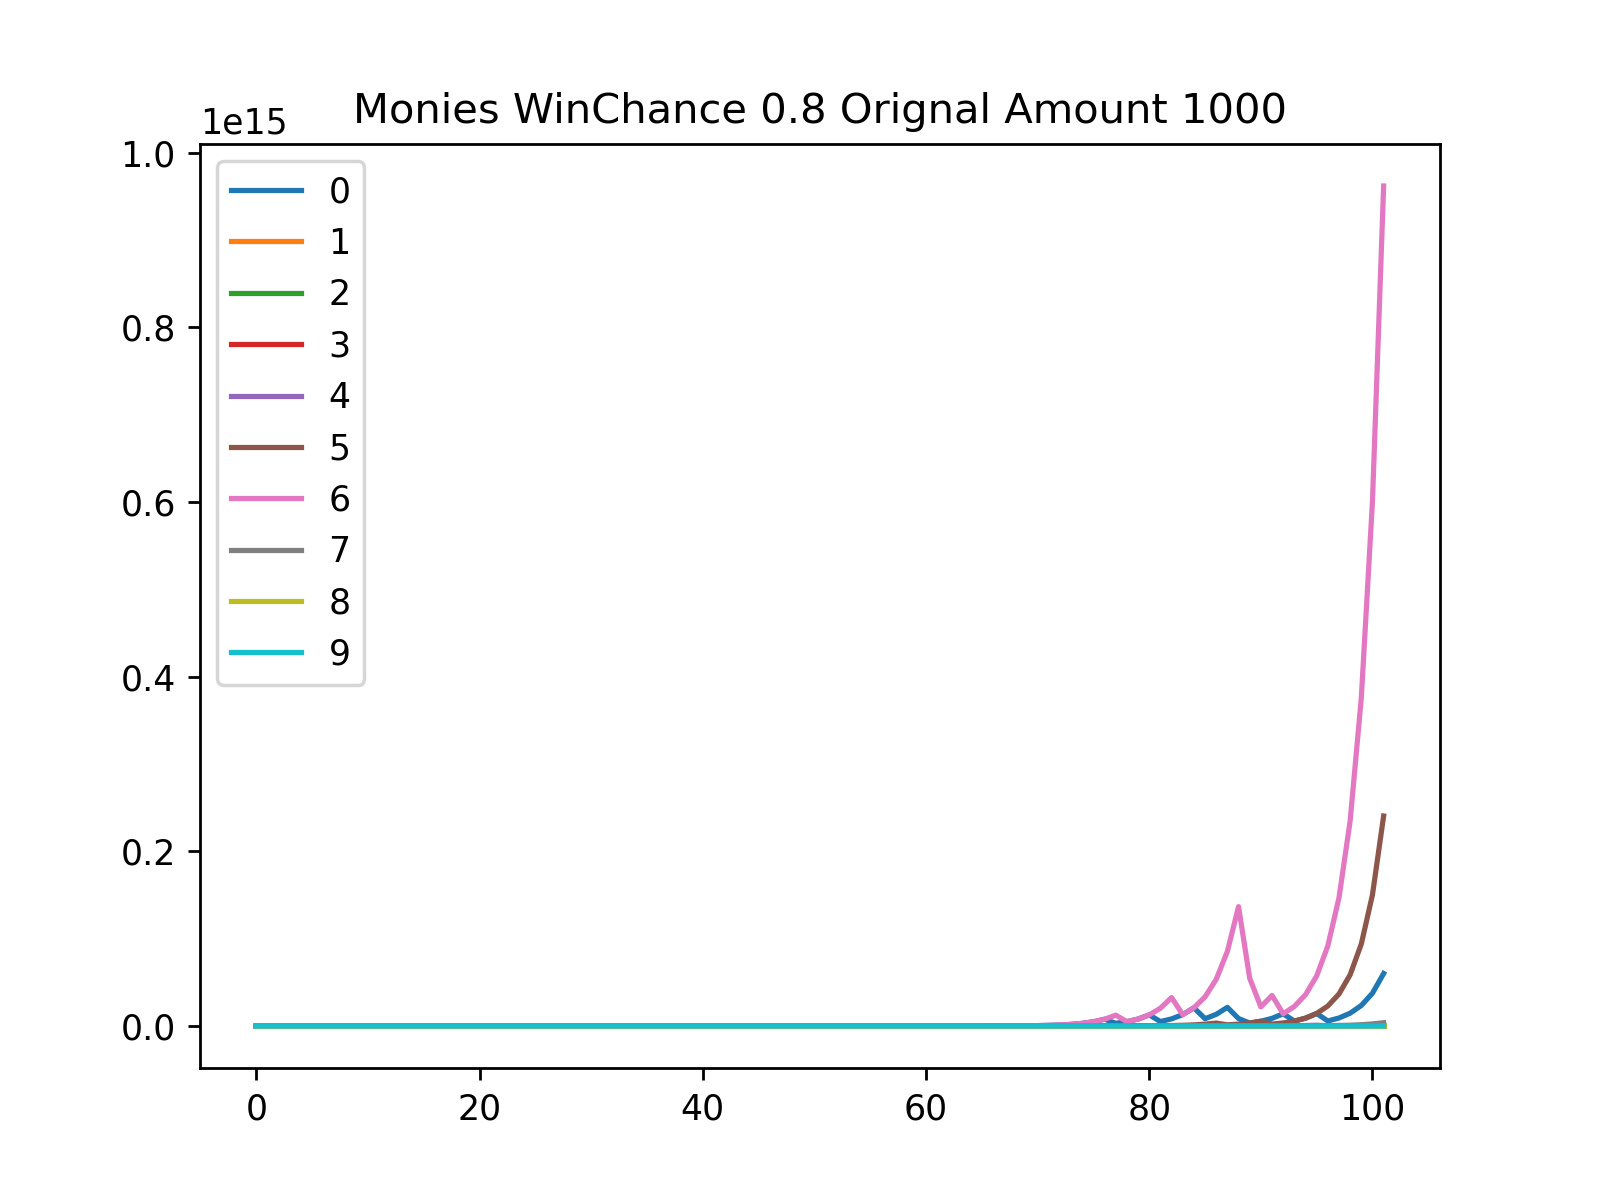

<IPython.core.display.Javascript object>


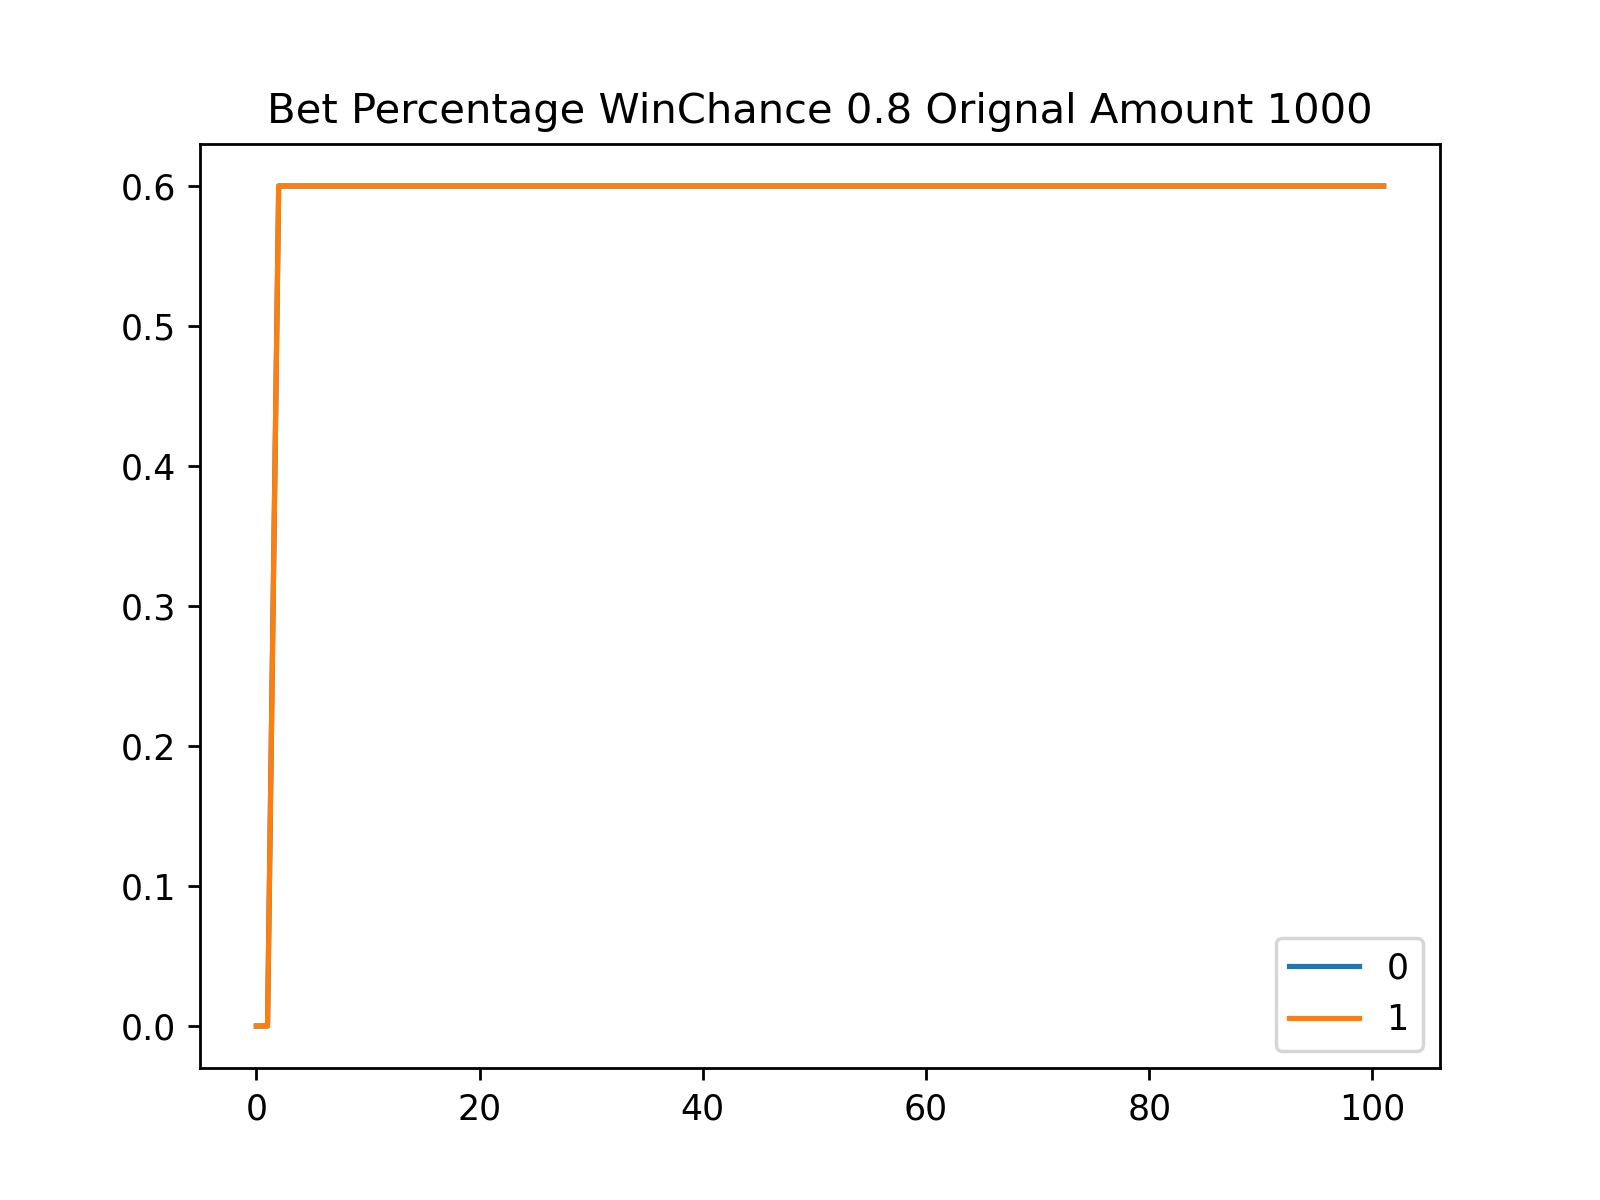

<IPython.core.display.Javascript object>


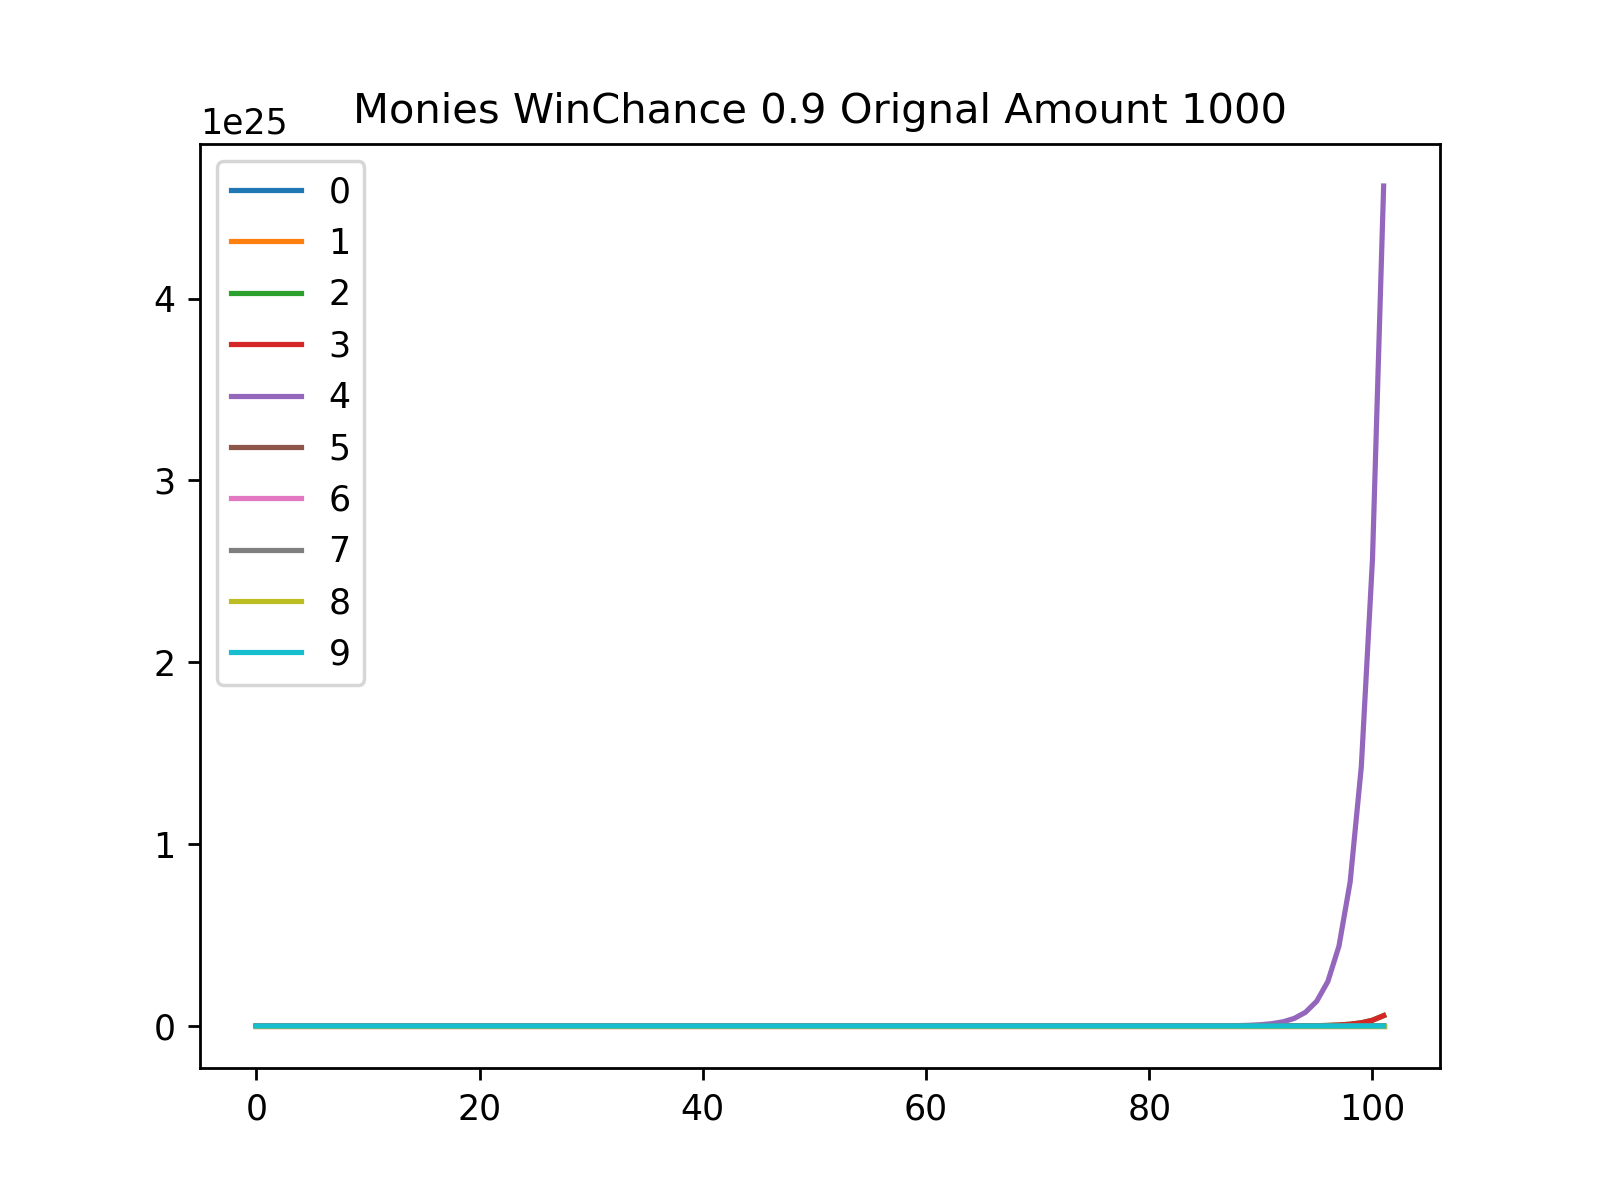

<IPython.core.display.Javascript object>


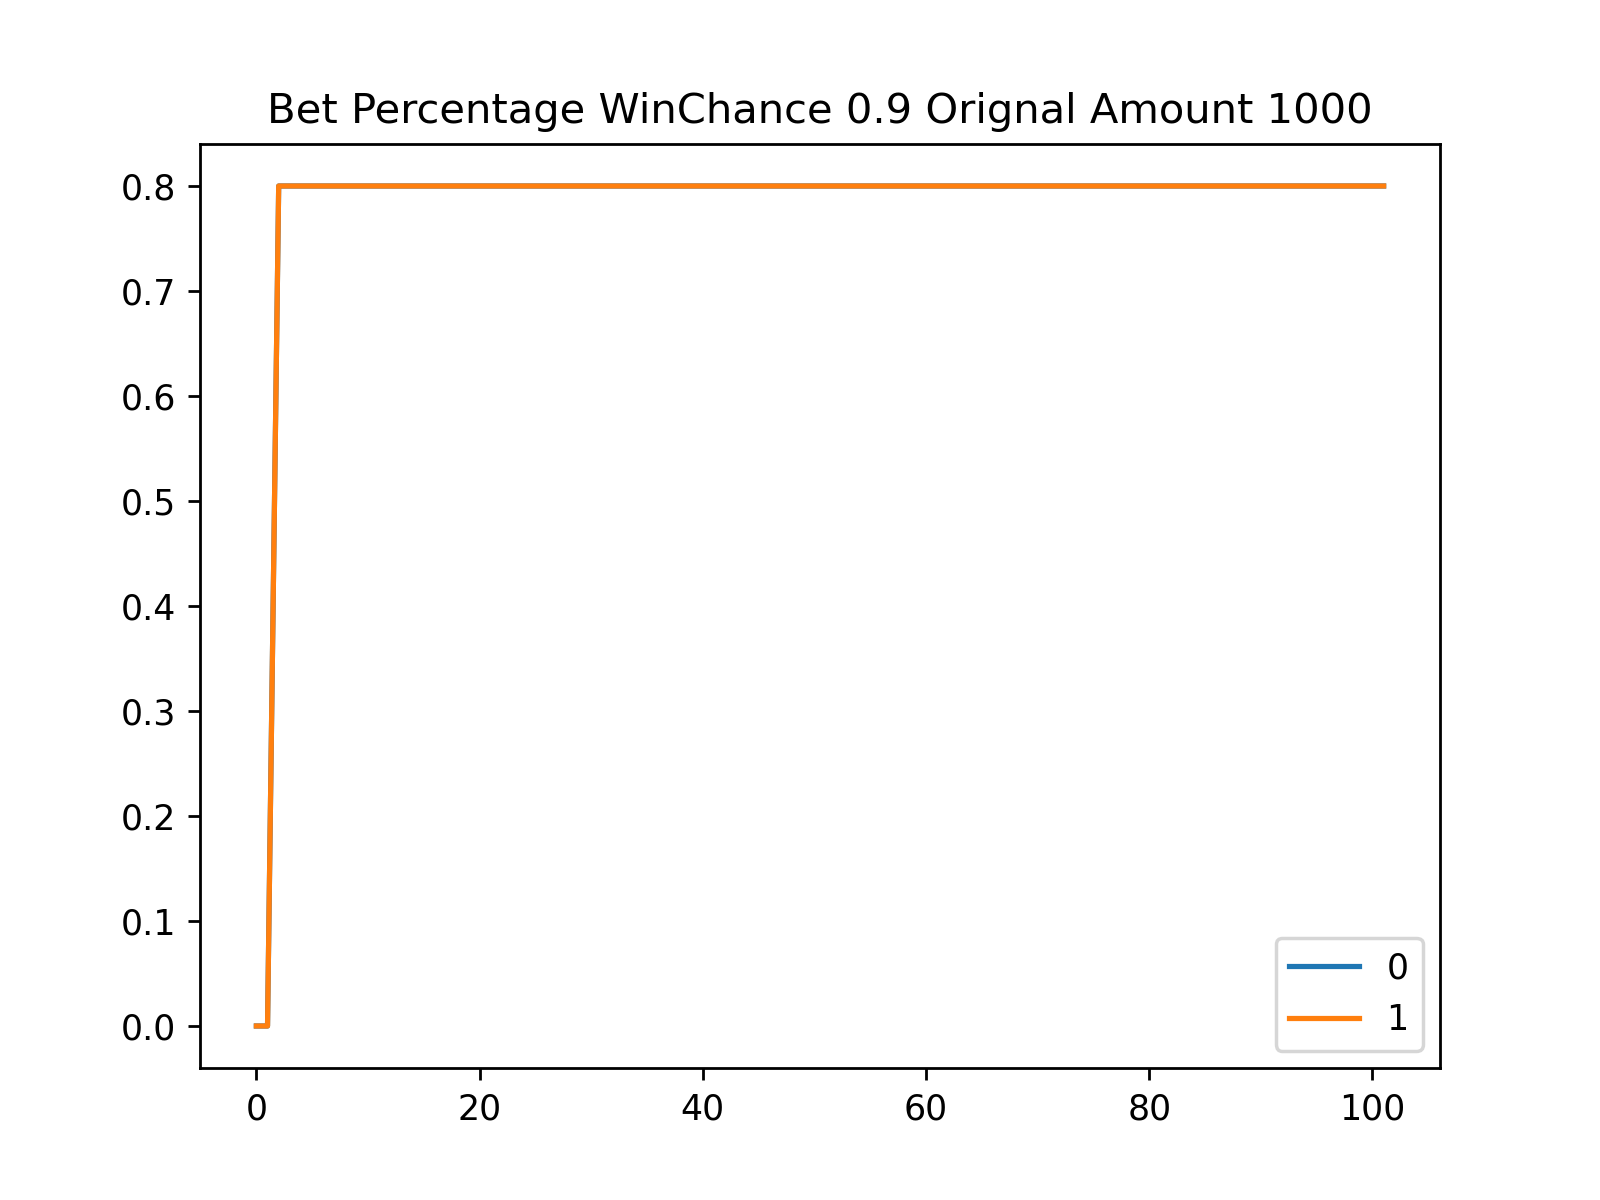

In [72]:
#fig = plt.figure(figsize=(1000,1500))
OriginalAmountOfMoney = 1000
for winChance in range(60,100,10):
    #df = pd.DataFrame(columns=["ContantBet", "Kelly", "ContantFraction","Martingale","AntiMartingale"])
    for i in range(10): # simulation size
        values = Chart(ChanceOfWinning=winChance/100.0, 
                    NumGames=100, OriginalAmountOfMoney=OriginalAmountOfMoney, 
                    FractionBetting=0.02, 
                    CanGoIntoDebt=True, BettingLimit=False, 
                    MaxBet=OriginalAmountOfMoney, 
                    seed=None,
                    PayOutOdds=2, ConstantBet=10)
        values = np.transpose(np.array(values))
        #print(values.shape)
        #print(values[:,1].reshape(-1,1).shape)
        if i == 0:
            all_monies_values = values[:,1].reshape(-1,1) # only kelly
            all_bet_amount = values[:,5].reshape(-1,1) # only kelly bet
        else:
            #print(values[:,1].reshape(-1))
            all_monies_values = np.concatenate([all_monies_values,values[:,1].reshape(-1,1)], axis=1) # monies for kelly
            all_bet_percentage = np.concatenate([all_bet_amount,values[:,5].reshape(-1,1)], axis=1) # monies for kelly
            #all_values = np.concatenate([all_values,values[:,5].reshape(-1,1)], axis=1) # amount if kelly       
        #print(all_values.shape)
    #df = pd.DataFrame(values, columns = ["ContantBet", "Kelly", "ContantFraction","Martingale","AntiMartingale"])
    #df[["ContantBet", "Kelly", "ContantFraction"]].plot(title="WinChance {} Orignal {}".format(winChance/100,OriginalAmountOfMoney))
    df = pd.DataFrame(all_monies_values) 
    df.plot(title="Monies WinChance {} Orignal Amount {}".format(winChance/100,OriginalAmountOfMoney))
    df = pd.DataFrame(all_bet_percentage) 
    #print(all_bet_percentage[0:10])
    df.plot(title="Bet Percentage WinChance {} Orignal Amount {}".format(winChance/100,OriginalAmountOfMoney))
    

<IPython.core.display.Javascript object>


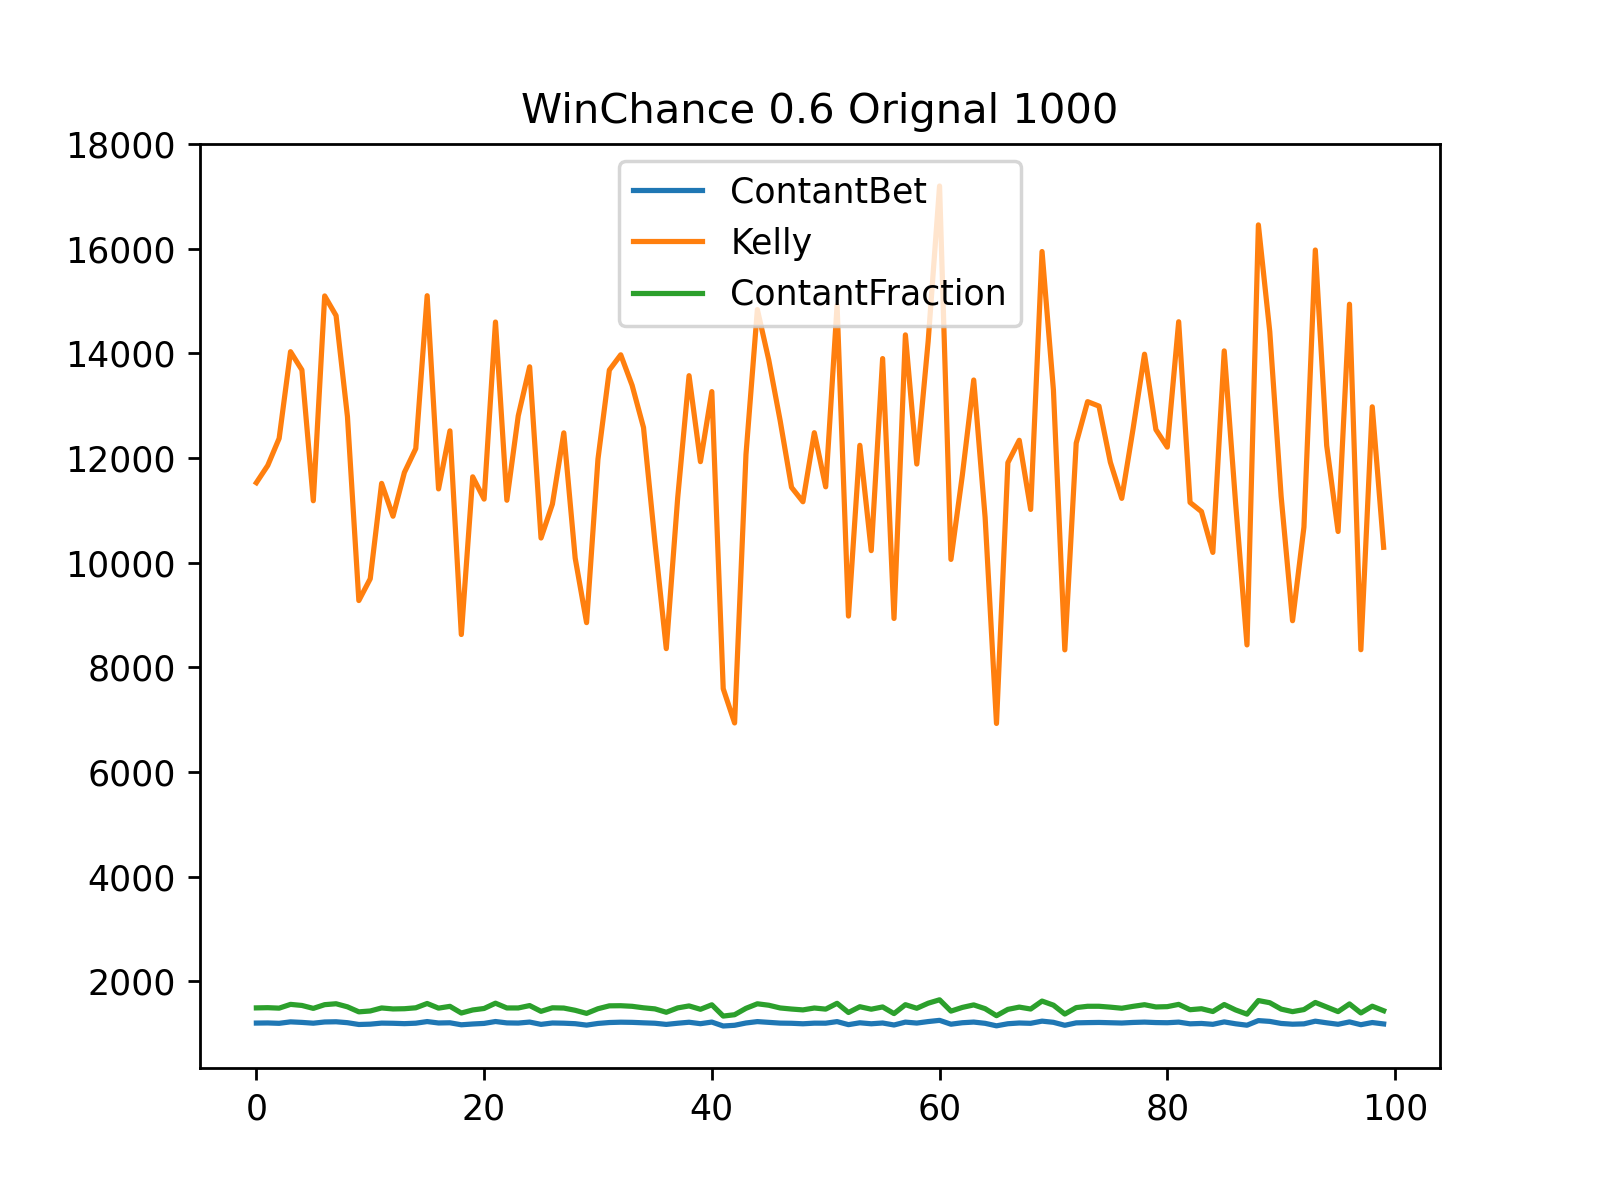

<IPython.core.display.Javascript object>


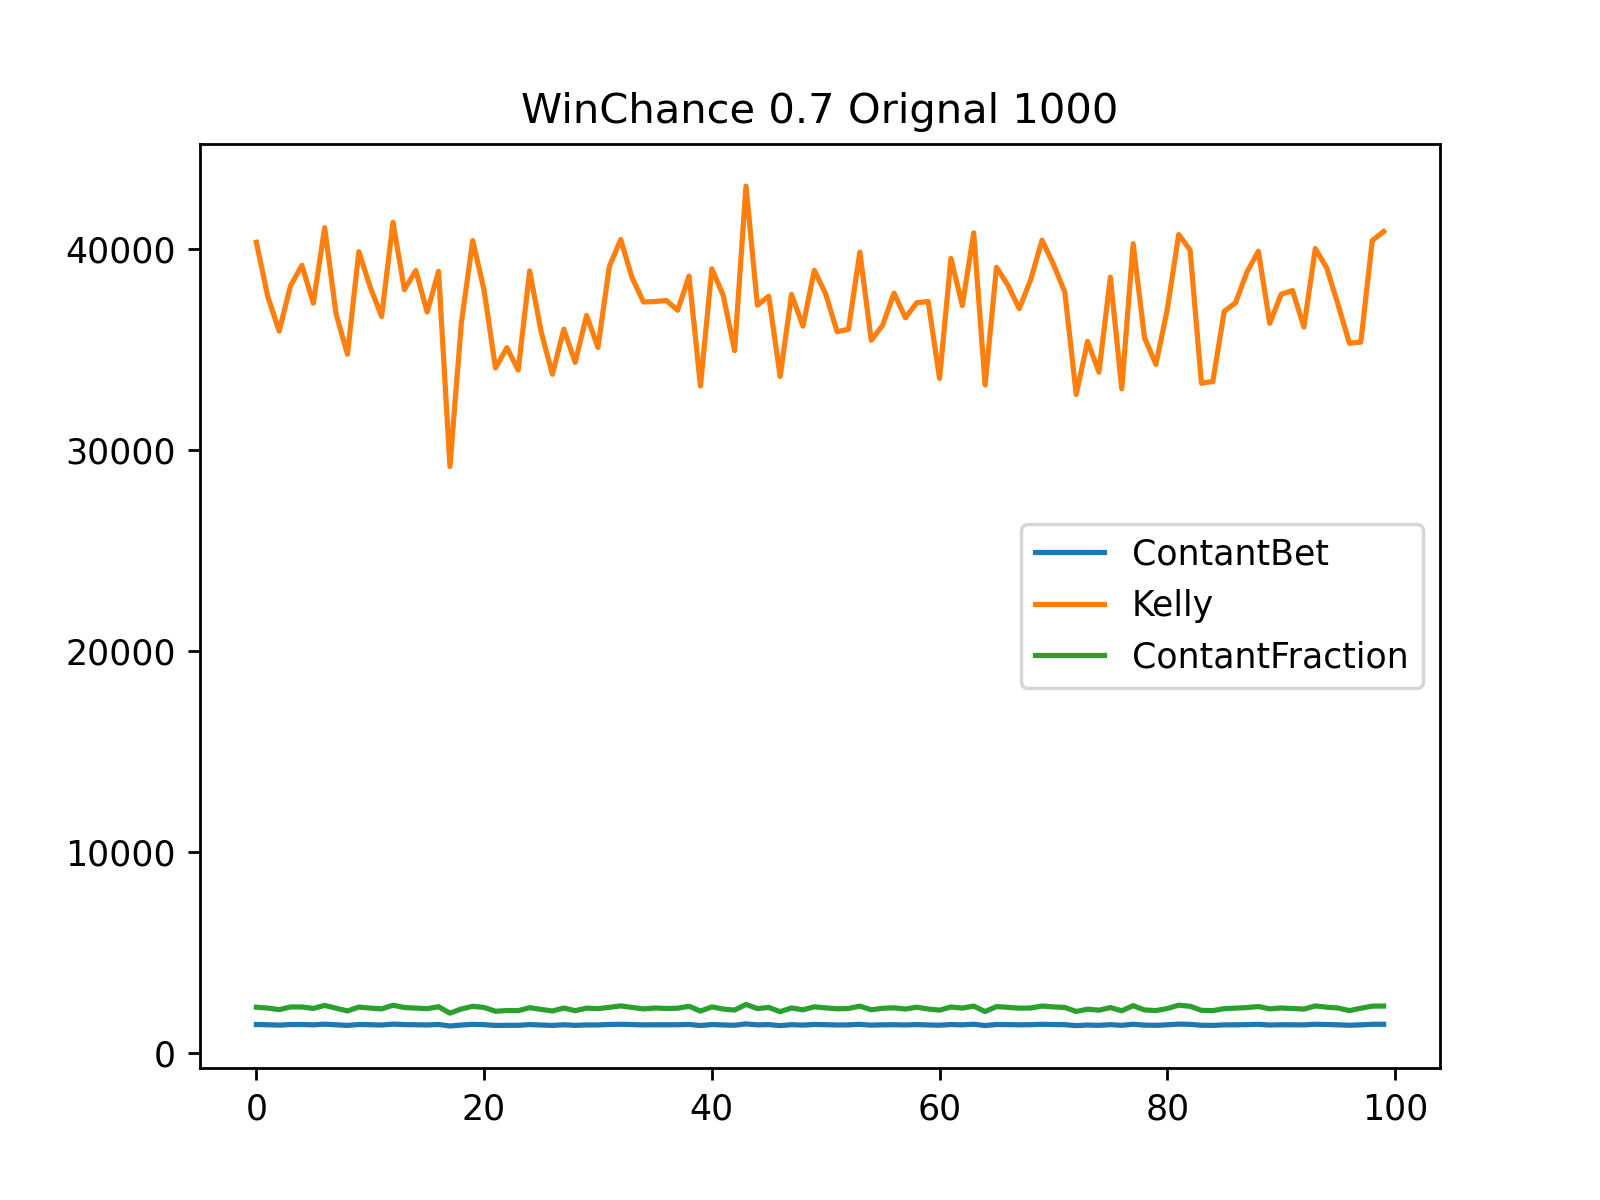

<IPython.core.display.Javascript object>


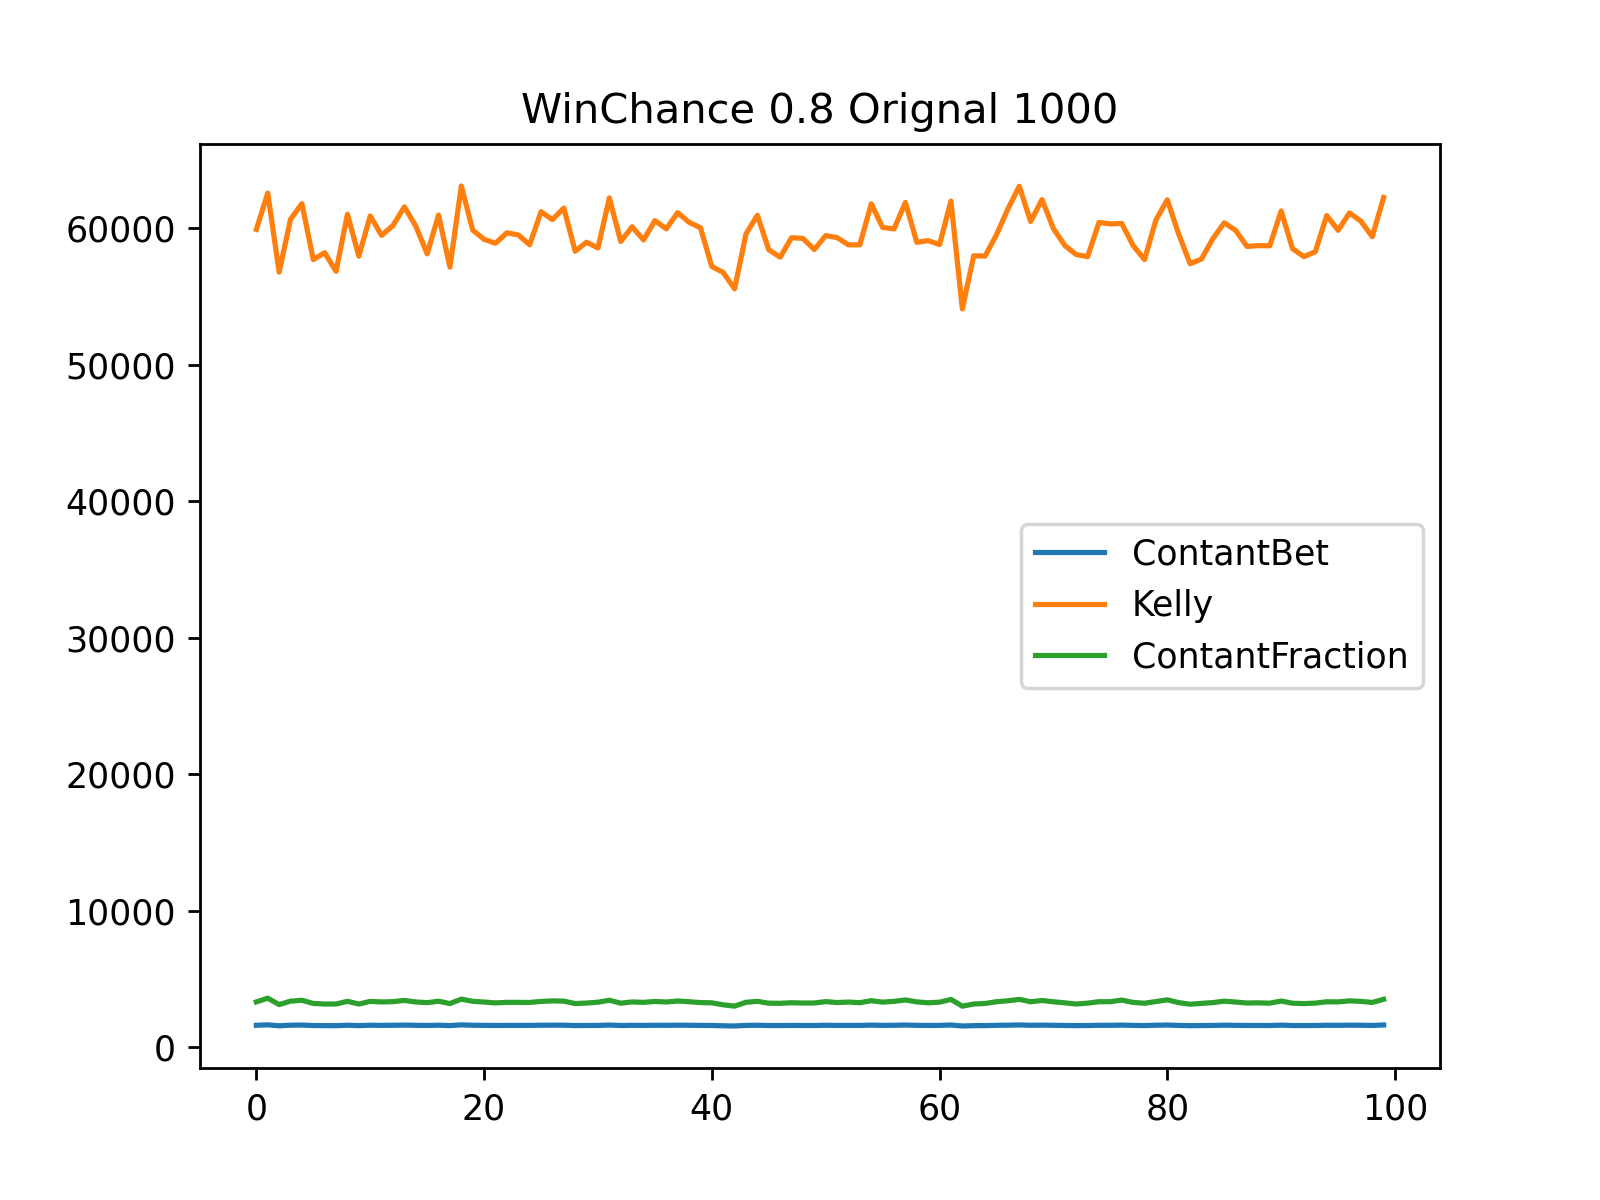

<IPython.core.display.Javascript object>


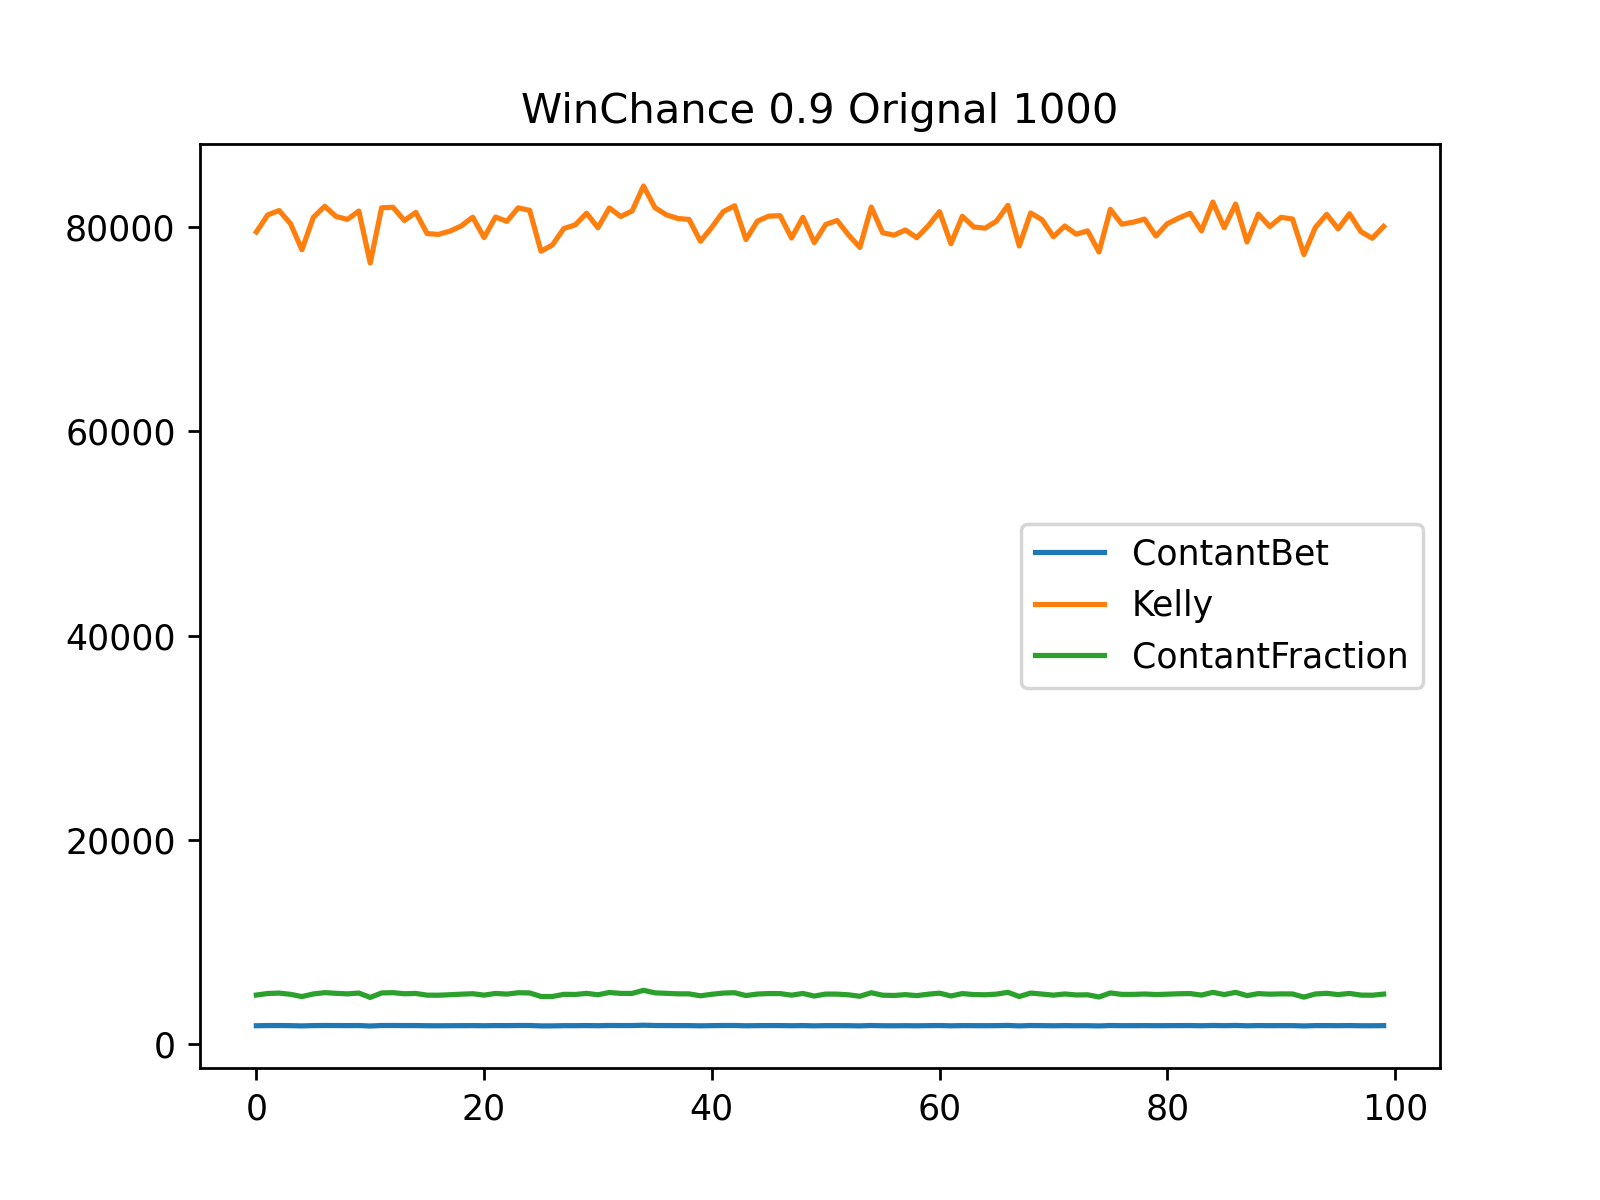

In [73]:
#fig = plt.figure(figsize=(1000,1500))
OriginalAmountOfMoney = 1000
for winChance in range(60,100,10):
    df = pd.DataFrame(columns=["ContantBet", "Kelly", "ContantFraction","Martingale","AntiMartingale"])
    for i in range(100):
        values = Chart_orginal(ChanceOfWinning=winChance/100.0, NumGames=100, OriginalAmountOfMoney=OriginalAmountOfMoney, 
              FractionBetting=0.02, CanGoIntoDebt=True, BettingLimit=10, MaxBet=OriginalAmountOfMoney, 
              seed=None,
              PayOutOdds=2, ConstantBet=10)
        
        avg_values = tuple(item / 25 for item in values)
        df.loc[i] = avg_values
    df[["ContantBet", "Kelly", "ContantFraction"]].plot(title="WinChance {} Orignal {}".format(winChance/100,OriginalAmountOfMoney))


In [74]:
df.head()

,ContantBet,Kelly,ContantFraction,Martingale,AntiMartingale
0,1789.6,79522.674973,4796.579527,18526.12,66585.30
1,1806.4,81191.200358,4945.775400,16483.28,68702.10
2,1810.4,81620.000358,4986.425768,15887.32,69000.56
3,1797.6,80335.370240,4865.822389,13865.00,67717.48
4,1772.8,77779.123200,4646.193990,19119.52,64676.36


<IPython.core.display.Javascript object>


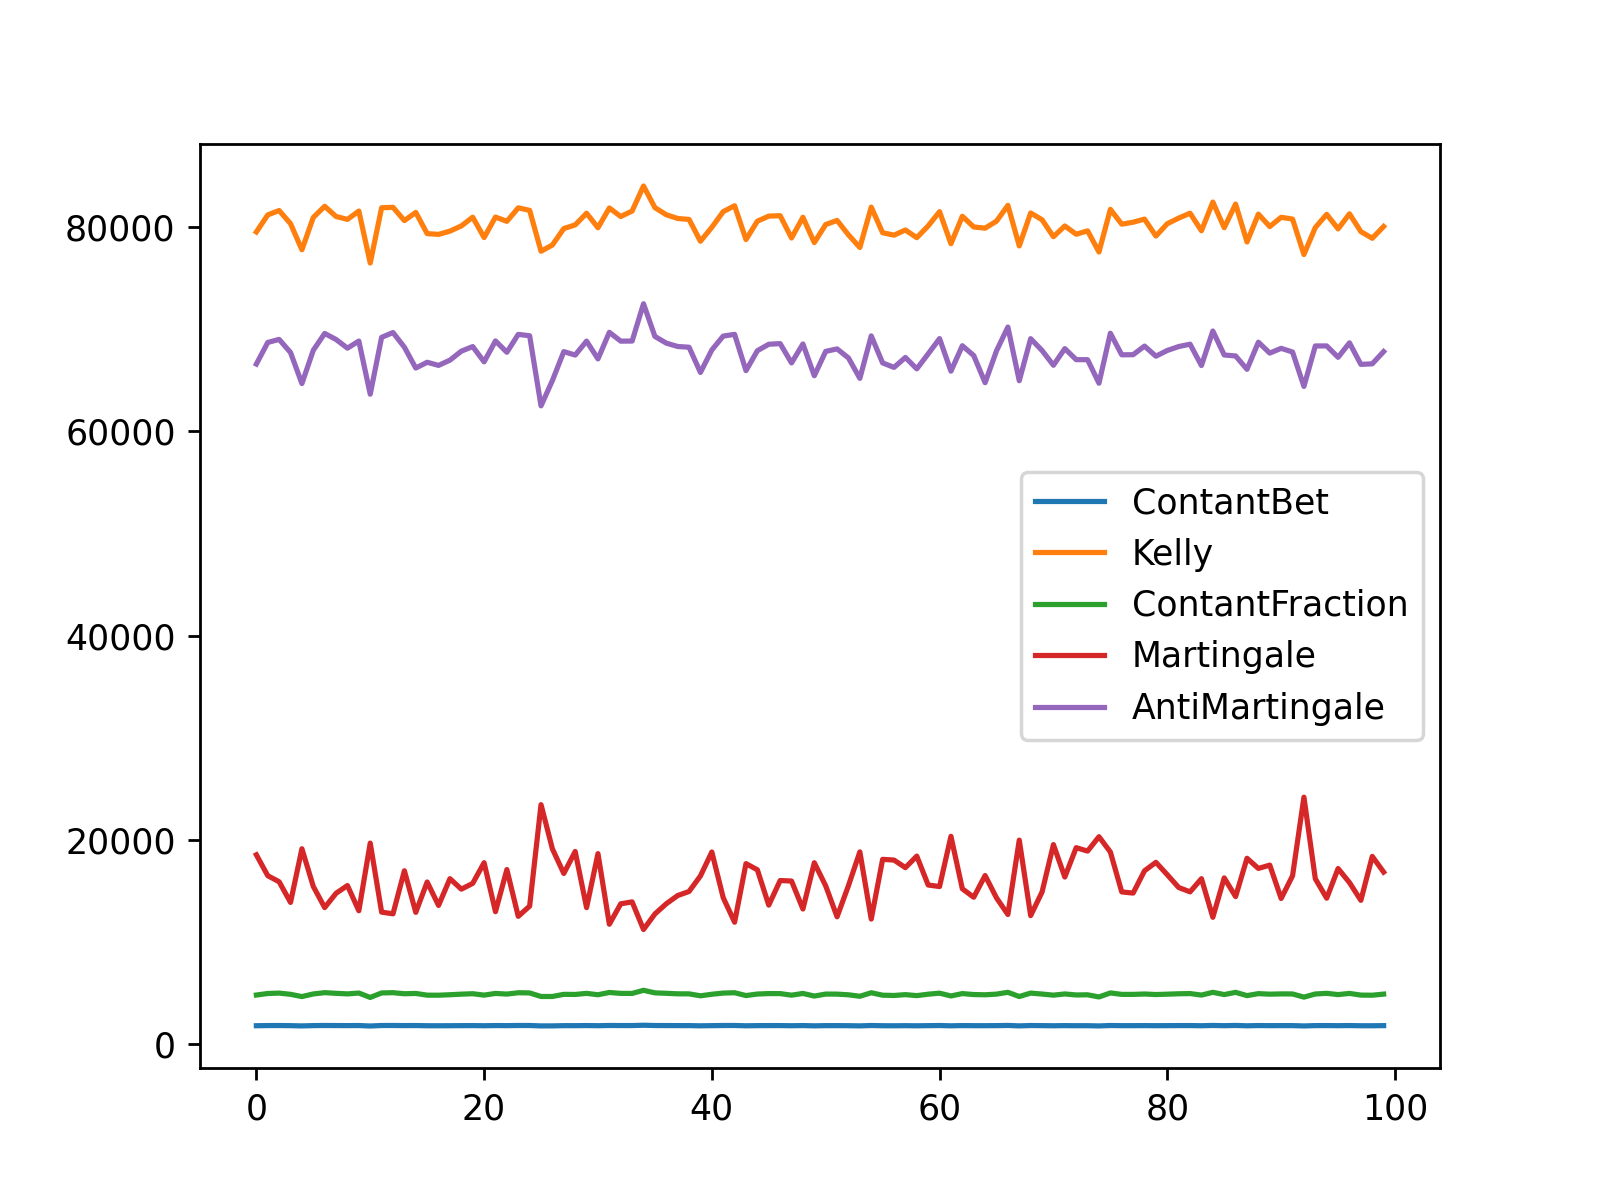

<AxesSubplot:>

In [75]:
df.plot()